In [15]:
from openpyxl import Workbook
from openpyxl.styles import Border, PatternFill, Side, Alignment, Font
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Create a new workbook
wb = Workbook()
ws = wb.active
ws.title = "Folha_Cert"

now = datetime.now()
new_date = now + relativedelta(months=3)

# Sample data (replace with your actual data)
data = [
    ["Data Subscribe", "Value Subscribe", "Data Renew", "Debs Tax", "Recover"],
    ["28/12/2022", 100, '28/03/2023', 0.0284, "TRUE"],
    ["06/01/2023", 4000, '06/04/2023', 0.0309, "TRUE"],
    ["23/01/2023", 1100, '23/04/2023', 0.0309, "TRUE"],
    ["06/03/2023", 2000, '06/06/2023', 0.0350, "TRUE"],
    ["22/05/2023", 2000, '22/08/2023', 0.0350, "TRUE"],
    ["31/07/2023", 3000, '31/10/2023', 0.0275, "TRUE"],
    ["25/09/2023", 2500, '25/12/2023', 0.0275, "TRUE"],
    ["01/02/2024", 3000, '01/05/2024', 0.0275, "FALSE"],
    ["27/03/2024", 1500, '27/06/2024', 0.0275, "FALSE"],
    ["27/06/2024", 2000, '27/09/2024', 0.0275, "FALSE"]
]

number_format = "[$-409]DD[/MM[/YYYY]]"
date_format = ws.cell(row=3, column=1).number_format  # Get default format
alignment = Alignment(horizontal='center')

# Input data in table using "data" array
for row in range(2, len(data) + 2):  
    for col in range(1, len(data[0]) + 1):
        ws.cell(row=row, column=col).value = data[row - 2][col - 1]

# Manually apply bold text and align header for center
for i in range(1, int(ws.max_column) + 1):
    ws.cell(row=2, column=i).alignment = alignment
    ws.cell(row=2, column=i).font = Font(bold=True)

# Manually apply borders and styles (example)
for row in range(1, len(data) + 2):
    for col in range(1, len(data[0]) + 1):
        cell = ws.cell(row=row, column=col)
        
        # Set borders
        cell.border = Border(top=Side(style='thin'), bottom=Side(style='thin'),
                             left=Side(style='thin'), right=Side(style='thin'))
        # Set background color (example)
        if row == 2:  # Format borders header and color
            cell.fill = PatternFill(start_color='FF90C2F0', end_color='FF90C2F0', fill_type='solid')
        if col == 2 and row >= 3: # Format money invested in Aforro
            cell.number_format = "#,##0€"
        elif col == 4 and row >= 3: # Format tax applied
            percentage_value = cell.value * 100
            cell.value = percentage_value

# Save the workbook
wb.save("formatted_table.xlsx")
wb.close()

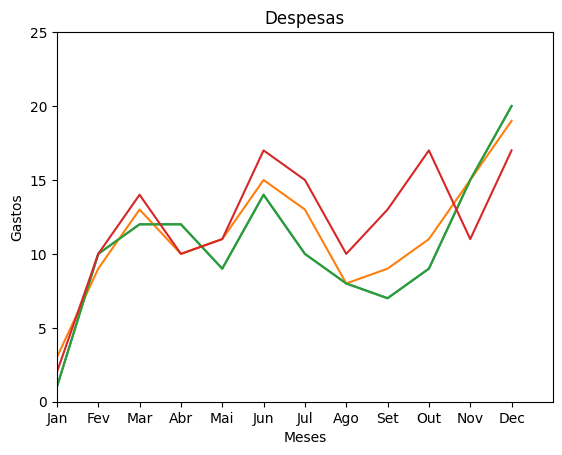

In [37]:
import matplotlib.pyplot as plt

plt.axis((0, 12, 0, 25))

x = ['Jan','Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set','Out','Nov','Dec']
y = [1, 10, 12, 12, 9, 14, 10, 8,7,9,15,20]
gas = [3, 9, 13, 10, 11, 15, 13, 8, 9,11,15,19]
elect = [2, 10, 14, 10, 11, 17, 15, 10, 13, 17, 11,17]
agua = [4, 15, 14, 5, 10, 13, 19, 18, 20, 22, 17,18]

plt.plot(x, y, gas)  # gráfico de linhas
plt.plot( x, y, elect) 
plt.title("Despesas")
plt.xlabel("Meses")
plt.ylabel("Gastos")

plt.show()


In [5]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import joblib

df = pd.read_csv('music.csv')

inputs = df.drop(['genre'], axis = 'columns')
target = df['genre']
model = DecisionTreeClassifier(model.random_state=5)

# getting data using information integer by inputs and targets
inputs_train, inputs_test, target_train, target_test = train_test_split(inputs, target, test_size = 0.8, stratify=target, random_state=5)

model.fit(inputs_train, target_train)

# getting data using information integer by inputs and targets
predictions = model.predict(inputs_test) 
# accurancy of data using some informations, line 8
score = accuracy_score(target_test, predictions)
score

0.4666666666666667

In [2]:
from openpyxl import load_workbook
from openpyxl.styles import Border, Side, PatternFill
from datetime import datetime
from dateutil.relativedelta import relativedelta
from colorama import Fore, Style


def save_info(file_to_load):
    wb = load_workbook(filename=file_to_load)
    sheet_ranges = wb['Folha_Cert']

    now = datetime.now()
    new_date = now + relativedelta(months=3)
    value_invest = int(input("Value invest: "))

    data = [
        [now.strftime("%d/%m/%Y"), int(value_invest), new_date.strftime("%d/%m/%Y"), 0.0275, "FALSE"]
    ]

    for row in range(2, len(data) + 2):
        max_row = sheet_ranges.max_row + 1
        for col in range(1, len(data[0]) + 1):
            sheet_ranges.cell(row=max_row, column=col).value = data[row - 2][col - 1]
            cell = sheet_ranges.cell(row=max_row, column=col)

            # Formatting borders data
            cell.border = Border(top=Side(style='thin'), bottom=Side(style='thin'), left=Side(style='thin'),
                                 right=Side(style='thin'))

            # Formatting cells
            if col == 2 and cell.row == max_row:
                cell.number_format = '#,##0€'
            elif col == 4 and cell.row == max_row:  # Format tax applied
                cell.value = round(cell.value * 100, 2)

    print(Style.BRIGHT + "The invest was added with success!")

    wb.save(file_to_load)

    print(Style.BRIGHT + Fore.GREEN + "Document saved!")
    wb.close()
    print(Style.BRIGHT + Fore.WHITE + "Document close!")


def update_info(file_to_load):
    wb = load_workbook(filename=file_to_load)
    sheet_ranges = wb['Folha_Cert']

    #value_updated = int(input("Value updated: "))
    #sheet_ranges.cell(row=24, column=2).value = value_updated
    
    wb.save(file_to_load)
    remove_rows(file_to_load)
    print(Style.BRIGHT + Fore.GREEN + "Document saved!")


def remove_rows(file_to_load):
    wb = load_workbook(filename=file_to_load)
    sheet_ranges = wb['Folha_Cert']
    line, _ = 3, 1
    for row in sheet_ranges.iter_rows(min_row=3, max_col=sheet_ranges.max_column, max_row=sheet_ranges.max_row, values_only=True):
        for cell in row:
            if cell == 0:
                sheet_ranges.delete_rows(line, amount=1)
        line += 1
    wb.save(file_to_load)
    wb.close()
    print(Style.BRIGHT + Fore.WHITE + "Document close!")


opt_menu = 0

while opt_menu < 3:
    print(Style.BRIGHT + Fore.WHITE + ''' 
    1 - Adding new register
    2 - Update investments
    3 - Exit
    ''')
    option = int(input(Style.BRIGHT + Fore.WHITE + "Option: "))

    if option == 1:
        opt_menu = option
        file = str(input("Name of file: "))
        save_info(file)  # to insert
    if option == 2:
        opt_menu = option
        file = str(input("Name of file: "))
        update_info(file)
    if option == 3:
        opt_menu = option
        print("Done!!")

 
    1 - Adding new register
    2 - Update investments
    3 - Exit
    


Option:  1
Name of file:  formatted_table.xlsx
Value invest:  1550


Document saved!
Document close!
 
    1 - Adding new register
    2 - Update investments
    3 - Exit
    


Option:  3


Done!!


In [1]:
import pandas as pd
from tabulate import tabulate
import glob

df = pd.read_excel('formatted_table.xlsx', sheet_name='Folha_Cert', header=1, engine='openpyxl', usecols='A:E')
print(tabulate(df, headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤══════════════════╤═══════════════════╤══════════════╤════════════╤═══════════╕
│    │ Data Subscribe   │   Value Subscribe │ Data Renew   │   Debs Tax │ Recover   │
╞════╪══════════════════╪═══════════════════╪══════════════╪════════════╪═══════════╡
│  0 │ 28/12/2022       │               100 │ 28/03/2023   │     2.84   │ True      │
├────┼──────────────────┼───────────────────┼──────────────┼────────────┼───────────┤
│  1 │ 06/01/2023       │              4000 │ 06/04/2023   │     3.09   │ True      │
├────┼──────────────────┼───────────────────┼──────────────┼────────────┼───────────┤
│  2 │ 23/01/2023       │              1100 │ 23/04/2023   │     3.09   │ True      │
├────┼──────────────────┼───────────────────┼──────────────┼────────────┼───────────┤
│  3 │ 06/03/2023       │              2000 │ 06/06/2023   │     3.5    │ True      │
├────┼──────────────────┼───────────────────┼──────────────┼────────────┼───────────┤
│  4 │ 22/05/2023       │              2000 │ 22/08/20

In [2]:
for x in range(1,11):
    print(" " * (10 - x) + "*" * x + "*" * x)

          
         **
        ****
       ******
      ********
     **********
    ************
   **************
  ****************
 ******************
********************


In [16]:
#How tall is Big Ben? - www.101computing.net/how-tall-is-big-ben-python-challenge/
# h = 2.51
# l = 1.74
# L = 66.55
#
# Input
h = float(input("height of the telephone box"))
l = float(input("height of the telephone box shadow"))
L = float(input("length of the shadow of the Elizabeth Tower"))

# Process
H = (h*L) / l

# Output
print(f"the height of the Eiffel Tower: {H:.2f}")

height of the telephone box 2.51
height of the telephone box shadow 1.74
length of the shadow of the Elizabeth Tower 66.55


the height of the Eiffel Tower: 96.00


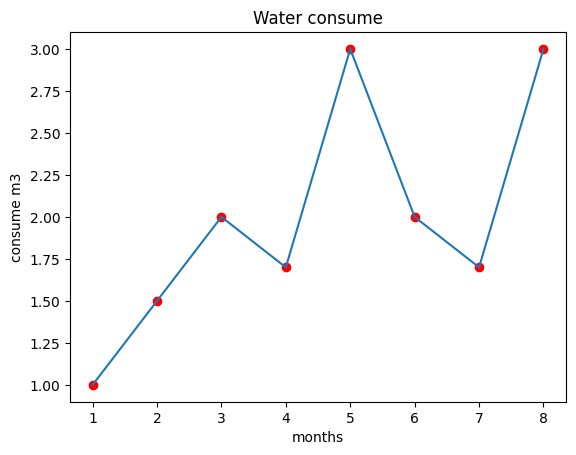

In [48]:
from matplotlib import pyplot as plt

plt.plot([1, 2, 3, 4, 5, 6, 7, 8], [1, 1.5, 2, 1.7, 3, 2, 1.7, 3], 'ro')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8], [1, 1.5, 2, 1.7, 3, 2, 1.7, 3])
plt.title("Water consume")
plt.xlabel('months')
plt.ylabel('consume m3')
plt.show()

In [2]:
print('\t'+'#' * 25)
print('\t'+"TABUADA DE MULTIPLICACAO")
print('\t'+'#' * 25)

for x in range(1,10):
    print('*' * 11)
    for y in range(1,10):
        value = int("{}".format(x*y))
        if value > 10:
            print("*" + " {}*{}={}".format(x, y, x * y) + " " * 2 + '*')
        if value < 10:
            print("*" + " {}*{}={}".format(x, y, x * y) + " " * 3 + '*')
print('*' * 11)

	#########################
	TABUADA DE MULTIPLICACAO
	#########################
***********
* 1*1=1   *
* 1*2=2   *
* 1*3=3   *
* 1*4=4   *
* 1*5=5   *
* 1*6=6   *
* 1*7=7   *
* 1*8=8   *
* 1*9=9   *
***********
* 2*1=2   *
* 2*2=4   *
* 2*3=6   *
* 2*4=8   *
* 2*6=12  *
* 2*7=14  *
* 2*8=16  *
* 2*9=18  *
***********
* 3*1=3   *
* 3*2=6   *
* 3*3=9   *
* 3*4=12  *
* 3*5=15  *
* 3*6=18  *
* 3*7=21  *
* 3*8=24  *
* 3*9=27  *
***********
* 4*1=4   *
* 4*2=8   *
* 4*3=12  *
* 4*4=16  *
* 4*5=20  *
* 4*6=24  *
* 4*7=28  *
* 4*8=32  *
* 4*9=36  *
***********
* 5*1=5   *
* 5*3=15  *
* 5*4=20  *
* 5*5=25  *
* 5*6=30  *
* 5*7=35  *
* 5*8=40  *
* 5*9=45  *
***********
* 6*1=6   *
* 6*2=12  *
* 6*3=18  *
* 6*4=24  *
* 6*5=30  *
* 6*6=36  *
* 6*7=42  *
* 6*8=48  *
* 6*9=54  *
***********
* 7*1=7   *
* 7*2=14  *
* 7*3=21  *
* 7*4=28  *
* 7*5=35  *
* 7*6=42  *
* 7*7=49  *
* 7*8=56  *
* 7*9=63  *
***********
* 8*1=8   *
* 8*2=16  *
* 8*3=24  *
* 8*4=32  *
* 8*5=40  *
* 8*6=48  *
* 8*7=56  *
* 8*8=64

In [13]:
from colorama import Fore, Style

count = 0

option = input("Telefonou para a vitima?")
option1 = input("Esteve no local do crime?")
option2 = input("Mora perto da vitima?")
option3 = input("Devia para a vitima?")
option4 = input("Já trabalhou com a vitima?")

is_crime = [ option, option1, option2, option3, option4 ]

check_val = is_crime.count("Sim")

if check_val <= 1:
    print(Style.BRIGHT + Fore.GREEN + "Inocente")
if check_val == 3 or check_val == 4:
    print(Style.BRIGHT + Fore.YELLOW +"Cúmplice")
elif check_val == 2:
    print(Style.BRIGHT + Fore.YELLOW +"Suspeita")
elif check_val == 5:
    print(Style.BRIGHT + Fore.RED +"Assassino")

Telefonou para a vitima? Sim
Esteve no local do crime? Sim
Mora perto da vitima? Sim
Devia para a vitima? Não
Já trabalhou com a vitima? Não


Cúmplice


In [6]:
print("Number\tSquare\tCube")
for num in range(1,6):
    print(f"{num}\t{num*num}\t{pow(num,3)}")

Number	Square	Cube
1	1	1
2	4	8
3	9	27
4	16	64
5	25	125


In [11]:
print("**************Calcular a area do rectangulo**************")
compr = float(input("Comprimento (cm): "))
alt = float(input("Altura (cm): "))
area = compr * alt
print(f"A area do rectangulo é {area} cm2")
print("*********************************************************")

**************Calcular a area do rectangulo**************


Comprimento (cm):  5.47
Altura (cm):  4.25


A area do rectangulo é 23.2475 cm2
*********************************************************



In [1]:

try:
    score_marks = int(input("What's your marks?"))
    if score_marks == 50:
        print("Sorry! You can't take admission. You Need 10 numbers more to take admission")
    elif score_marks < 60:
        print("Don't allow to take admission")
    elif score_marks >= 60:
        print("Congrats!! You're allow to take admission")
    else: # This 'else' block runs only if the loop completes without a 'break'
        print("The maximum of score marks is 100")
except ValueError:
        print("Invalid input. Please enter a number.")

What's your marks? 22


Don't allow to take admission


In [ ]:
address = input("What's your address?")
marks = input("What's your marks?")
print(f"Your address is {address} and your marks is {marks}")

In [38]:
num1 = int(input("Get first number: "))
num2 = int(input("Get first number: "))
num3 = int(input("Get first number: "))

print("SUM\tSUB\tMULT\tDIV")

print(f"{num1+num2+num3}\t{num1-num2-num3}\t{num1*num2*num3}\t{num1/num2/num3}")

Get first number:  8
Get first number:  1
Get first number:  9


SUM	SUB	MULT	DIV
18	-2	72	0.8888888888888888


In [18]:
import os
import tkinter as tk
from tkinter import ttk, font, messagebox

def populate_file_photo_tree(path):
    valid_files = [".jpg", ".gif", ".png", ".jpeg", ".webp"]
    clear_window()
    for f in os.listdir(path):
        ext = os.path.splitext(f)[1]
        if ext.lower() in valid_files:
            image_path = os.path.join(path, f)
            if os.path.isfile(image_path):
                try:
                    label_photo = tk.Label(windows, text=f"{image_path}")
                    label_photo.pack()
                except Exception as e:
                    messagebox.showerror("Error load data..", f"An unexpected error occurred: {e}")

def populate_file_video_tree(path):
    valid_files = [".mov", ".mp4"]
    clear_window()
    for f in os.listdir(path):
        ext = os.path.splitext(f)[1]
        if ext.lower() in valid_files:
            image_path = os.path.join(path, f)
            if os.path.isfile(image_path):
                try:
                    label_video = tk.Label(windows,text=f"{image_path}")
                    label_video.pack()
                except Exception as e:
                    messagebox.showerror("Error load data..", f"An unexpected error occurred: {e}")

def clear_window():
    for widget in windows.winfo_children():
        if widget not in (menubar, menu, menu_2):
            widget.destroy()

folder = "C:/Users/Nuno/Downloads/"

# Create the main window
windows = tk.Tk()
windows.title("Change Name")
windows.iconbitmap("185095_icon.ico")
windows.geometry("800x600")

# Create a menu bar
menubar = tk.Menu()
windows.config(menu=menubar)

# Create entries menu
menu = tk.Menu(menubar, tearoff=0)
menu_2 = tk.Menu(menubar, tearoff=0)

wc_label = tk.Label(windows, text=f"Welcome to get the photos and videos files from {folder}", font=("Helvetica", 12, "bold"), padx=5, pady=50) 
wc_label.pack()

# Menu open and load data Excel file and insert new data
menubar.add_cascade(label="File", menu=menu)
menu.add_command(label="Load Foto", command=lambda: populate_file_photo_tree(folder))
menu.add_command(label="Load Videos", command=lambda: populate_file_video_tree(folder))

# Menu close menu window
menubar.add_cascade(label="Windows", menu=menu_2)
menu_2.add_command(label="Exit", command=windows.quit)

windows.mainloop()

In [3]:
###############################################################
## CALCULO DE EQUAÇÕES - APLICAÇÃO
###############################################################

import os
import tkinter as tk
from sympy import symbols, solve
from tkinter import ttk, font, messagebox

def equation_calc(frm, equ1):
    # Define the symbolic variable
    x = symbols('x')
    solution = solve(equ1, x)
    result = tk.Label(frm, text=f"The solution of equation is {solution}").grid(row=0, column=0, padx=3, pady=3)
    return result

# Create the main window
windows = tk.Tk()
windows.title("Calculo Equação")
windows.iconbitmap("185095_icon.ico")
windows.geometry("350x150")

# Define the equation (SymPy requires the equation to be equal to zero)
frm_insert = tk.Frame(windows, padx=25, pady=10)
frm_insert.pack(expand=True, fill="both")

frm_result = tk.Frame(windows, padx=50, pady=20)
frm_result.pack(expand=True, fill="both")

tk.Label(frm_insert, text="Input equation: ", fg="black", font=font.Font(weight="bold")).grid(row=0, column=0, padx=3, pady=3)
value_entry = tk.Entry(frm_insert)
value_entry.grid(row=0, column=1, padx=5, pady=5)
tk.Button(frm_insert, text="OK", width=2, height=1, fg="blue", command=lambda: equation_calc(frm_result, value_entry.get()), font=font.Font(weight="bold")).grid(row=0, column=2, padx=5, pady=5)

windows.mainloop()